# Customer Churn Analysis

## Project Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

## Problem Statement
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df_churn=pd.read_csv("customer churn.csv")
#pd.options.display.max_columns=None
df_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Starting the EDA

In [3]:
# Checking Configuration of Dataset
df_churn.shape

(7043, 21)

Obs- We can see the dataset is a very huge with 7043 Rows and 21 Columns

In [4]:
# Checking the Columns
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Obs- The output column is 'Churn' which is affected by the other 20 input columns

In [5]:
# Checking data types of attributes
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Obs- We can see the dataset contains both continuous and categorical columns, In-fact 'customer-ID' and 'Total Charges' , which are numeric in nature , have datatypes as object, so we will be typecasting 'Total Charges'( Not Customer-ID, since that is not required and we will be deleting that column)

In [6]:
# Typecasting 'TotalCharges' from object to float
df_churn["TotalCharges"]=df_churn["TotalCharges"].str.strip()
df_churn["TotalCharges"]=pd.to_numeric(df_churn["TotalCharges"])

In [7]:
# Checking the datatype of 'TotalCharges'
df_churn['TotalCharges'].dtype

dtype('float64')

In [8]:
# Checking for null values if any
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Obs- We can see null values are present only in 'TotalCharges' column, filling the missing value with mean further

In [9]:
# filling the missing values in TotalCharges column with the mean of TotalCharges values.
df_churn["TotalCharges"]=df_churn["TotalCharges"].fillna(df_churn["TotalCharges"].mean())

In [10]:
# Rechecking for null value
df_churn['TotalCharges'].isnull().sum()

0

In [11]:
# Checking for white spaces
#pd.options.display.max_columns=None
#pd.options.display.max_rows=None
df_churn.loc[0:]==" "

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Obs- There is no white space in the database (Viewed it by setting, display max rows, max columns)

In [12]:
#Check for duplicate data
df_churn.duplicated().sum()

0

Obs- There is no duplicate data present in the dataset

#### Drop Irrelevant Column

In [13]:
df_churn.drop('customerID',axis=1,inplace=True)

In [14]:
df_churn.shape

(7043, 20)

In [15]:
# Checking the Unique Values in each column
df_churn.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### Seperating Numerical and Categorical Column

In [16]:
cat_cols = [x for x in df_churn.columns if df_churn[x].dtypes=='O']

num_cols = [y for y in df_churn.columns if df_churn[y].dtypes!='O']

## Visualization

### 1. Univariate Analysis

Male      3555
Female    3488
Name: gender, dtype: int64


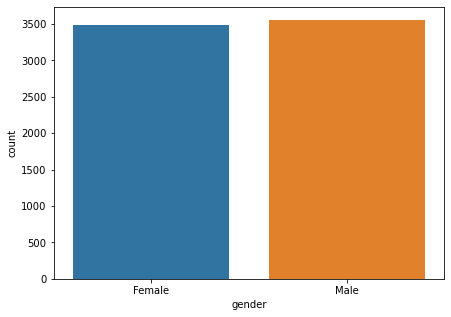

In [17]:
# Count plot to check individual value counts of 'gender'
print(df_churn['gender'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['gender'])
plt.show()

Obs- There is almost similar no. of both male and females who use telecom services

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


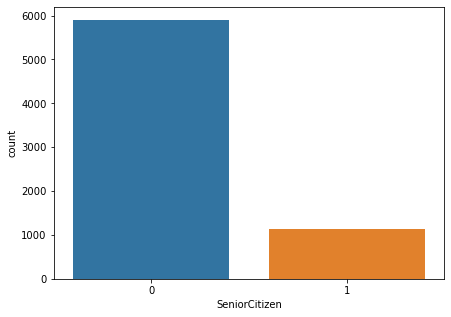

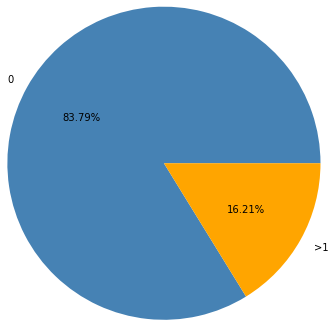

In [18]:
# Count plot to check individual value counts of 'SeniorCitizen'
print(df_churn['SeniorCitizen'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['SeniorCitizen'])
fig, ax = plt.subplots()
ax.pie(df_churn['SeniorCitizen'].value_counts(),labels = ['0','>1'], radius=1.8,autopct='%1.2f%%',colors=['steelblue','orange'])
plt.show()

Obs- We can see 16.21% of population that uses telecom services are Senior Citizen.

No     3641
Yes    3402
Name: Partner, dtype: int64


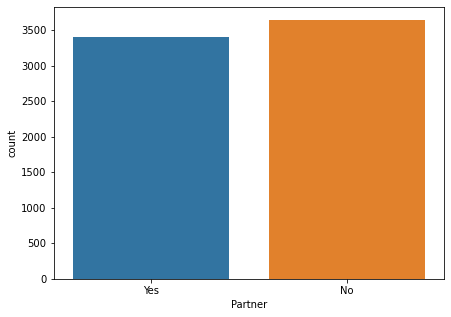

In [19]:
# Count plot to check individual value counts of 'gender'
print(df_churn['Partner'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['Partner'])
plt.show()

Obs- There is an almost equal proportion of people who have as well as don't have partners

No     4933
Yes    2110
Name: Dependents, dtype: int64


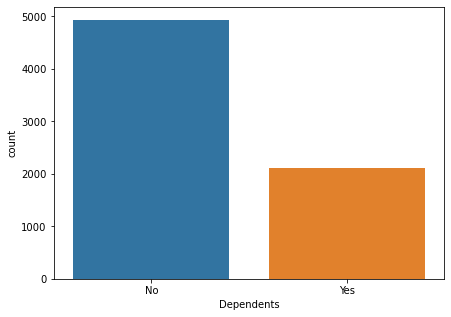

In [20]:
# Count plot to check individual value counts of 'gender'
print(df_churn['Dependents'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['Dependents'])
plt.show()

Obs- We can see 4933 customers have no depndents on them. while 2110 customers have dependents on them

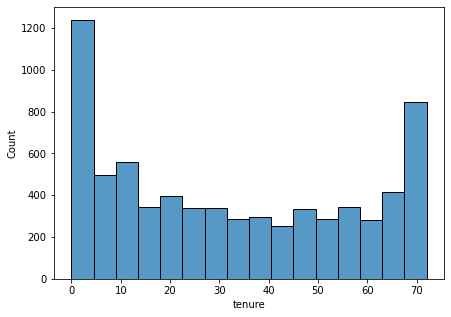

In [21]:
# Histgram to check distribution of Number of months the customer has stayed with the company
plt.figure(figsize=(7,5))
sns.histplot(df_churn['tenure'])
plt.show()

Obs- We can see a very good amount of people have just selected the company's service(i.e either they are 1st time using the telecom service or have shifted from other service to their's), and there are many customers who have stayed over 70 months with the company too. The concern matter is there are customers who have stayed for just 10-15 months

Yes    6361
No      682
Name: PhoneService, dtype: int64


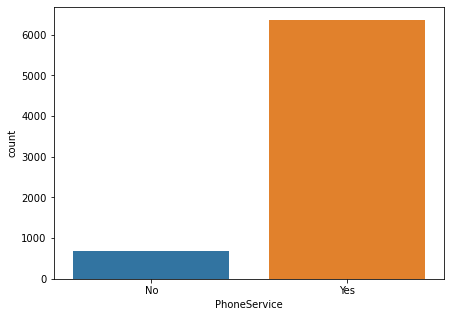

In [22]:
# Count plot to check individual value counts of 'PhoneService'
print(df_churn['PhoneService'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['PhoneService'])
plt.show()

Obs- We can see the maximum customers are involved with the company for 'PhoneService'

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


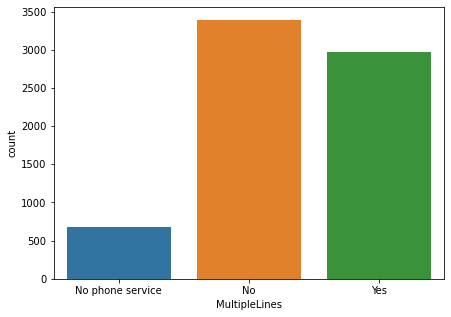

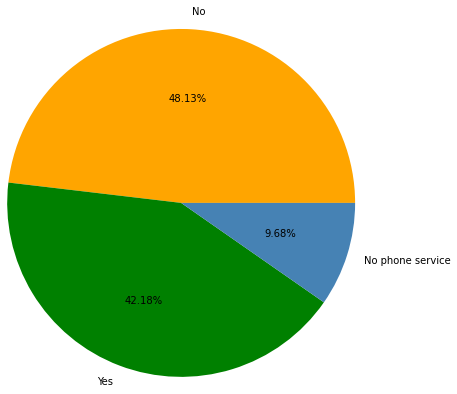

In [23]:
# Count plot to check individual value counts of 'MultipleLines'
print(df_churn['MultipleLines'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['MultipleLines'])
fig, ax = plt.subplots()
ax.pie(df_churn['MultipleLines'].value_counts(),labels = ['No','Yes','No phone service'], radius=2,autopct='%1.2f%%',colors=['orange','green','steelblue'])
plt.show()

Obs- We can see nearly 48.13% of population have no multiple lines, while 42.18% have multiple lines and 9.68% have no phone service

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


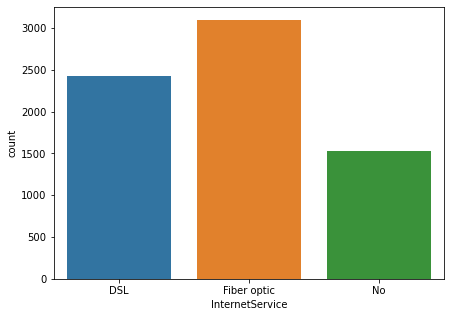

In [24]:
# Count plot to check individual value counts of 'InternetService'
print(df_churn['InternetService'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['InternetService'])
plt.show()

Obs- We can see the Internet Service users use Fibre optic the most then 'DSL'

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

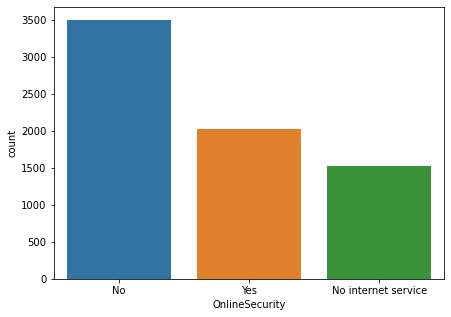

In [25]:
# Count plot to check individual value counts of 'OnlineBackup'
print(df_churn['OnlineSecurity'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['OnlineSecurity'])

Obs- We can see 3498 customers don't use online security, and 2019 use OnlineSecurity, and few who dont use Internet Service

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


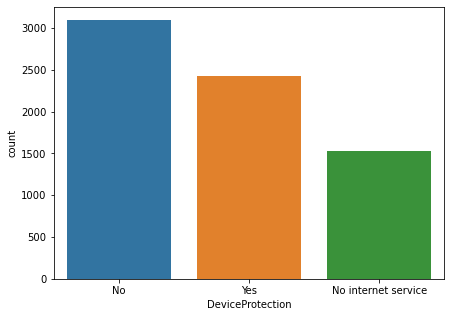

In [26]:
# Count plot to check individual value counts of 'DeviceProtection'
print(df_churn['DeviceProtection'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['DeviceProtection'])
plt.show()

Obs- Major customers dont use Device Protection, while there are still many who dont use DeviceProtection 

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


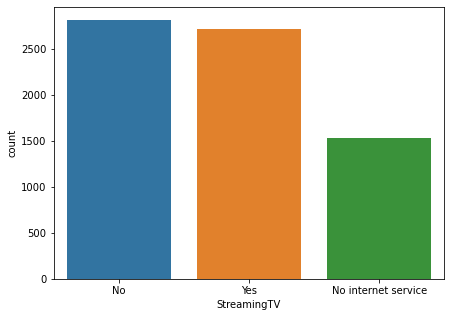

In [27]:
# Count plot to check individual value counts of 'StreamingTV'
print(df_churn['StreamingTV'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['StreamingTV'])
plt.show()

Obs- We can see 2707 also use 'StreamingTv' and 2707 do not 

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


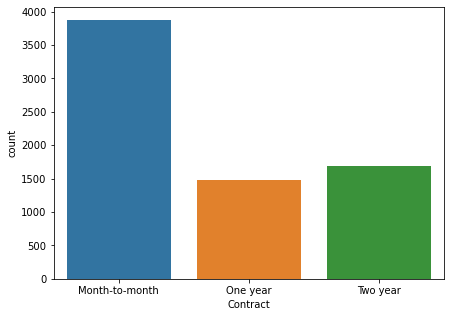

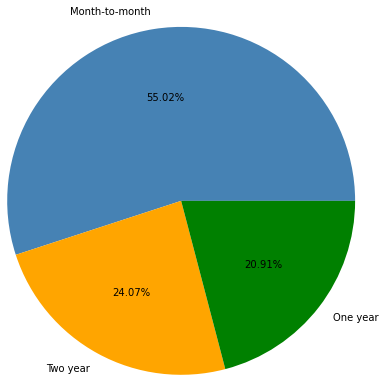

In [28]:
# Count plot to check individual value counts of 'Contract '
print(df_churn['Contract'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['Contract'])
fig, ax = plt.subplots()
ax.pie(df_churn['Contract'].value_counts(),labels = ['Month-to-month','Two year','One year'], radius=2,autopct='%1.2f%%',colors=['steelblue','orange','green'])
plt.show()

Obs- We can see 56.02% customers go for month-to-month plan, while 20.91% opt for yearly plan and 24.07% who opt for two-year plan

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


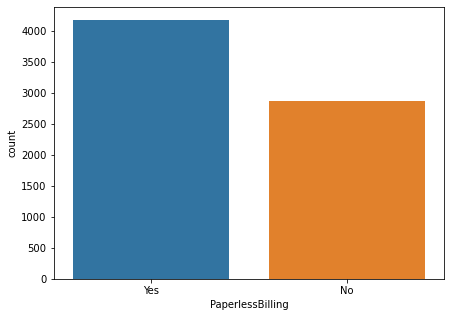

In [29]:
# Count plot to check individual value counts of 'PaperlessBilling'
print(df_churn['PaperlessBilling'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['PaperlessBilling'])
plt.show()

Obs- We can see more people are now inclined towards paperless billing

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


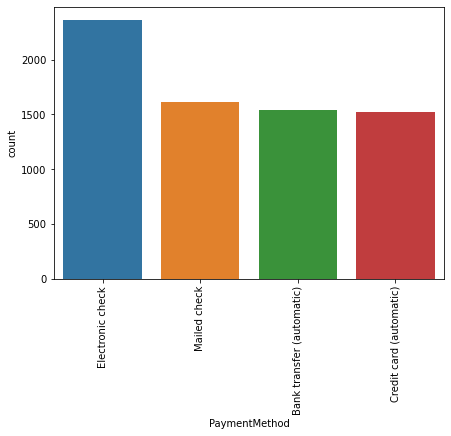

In [30]:
# Count plot to check individual value counts of 'PaymentMethod'
print(df_churn['PaymentMethod'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['PaymentMethod'])
plt.xticks(rotation=90)
plt.show()

Obs- We can see, the payment method used most by the customers is 'Electronic check', followed by 'Mailed check' and then, 'Bank transfer (automatic)' and 'Credit card (automatic)'

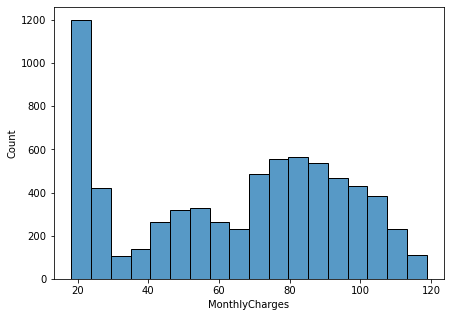

In [31]:
# Histgram to check distribution of MonthlyCharges
plt.figure(figsize=(7,5))
sns.histplot(df_churn['MonthlyCharges'])
plt.show()

Obs- A minimum Monthly Charges of 20 Dollars is been spend by majority of the customers, many also spend 70-100  (as they might be using their other services like internet, tv) and few who even spend nearly 120 dollars

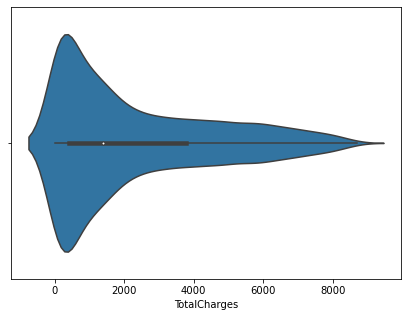

In [32]:
# Histgram to check distribution of TotalCharges
plt.figure(figsize=(7,5))
sns.violinplot(df_churn['TotalCharges'])
plt.show()

Obs- We can see the 'TotalCharges' spent by most customers lies around 500 $ and it goes to maximum to 8000 

No     5174
Yes    1869
Name: Churn, dtype: int64


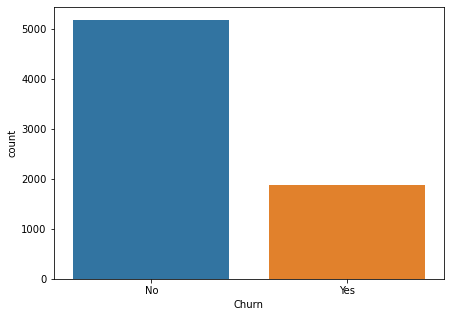

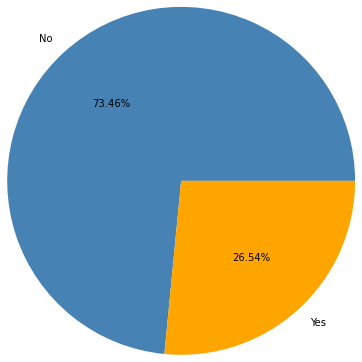

In [33]:
# Count plot to check individual value counts of 'Churn'
print(df_churn['Churn'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['Churn'])
fig, ax = plt.subplots()
ax.pie(df_churn['Churn'].value_counts(),labels = ['No','Yes'], radius=2,autopct='%1.2f%%',colors=['steelblue','orange'])
plt.show()

Obs- We can see the telecome company is able to retain 73.46% of its customers, while the churn is 26.54% 

In [34]:
# Distribution plot to check skewness in the numerical features

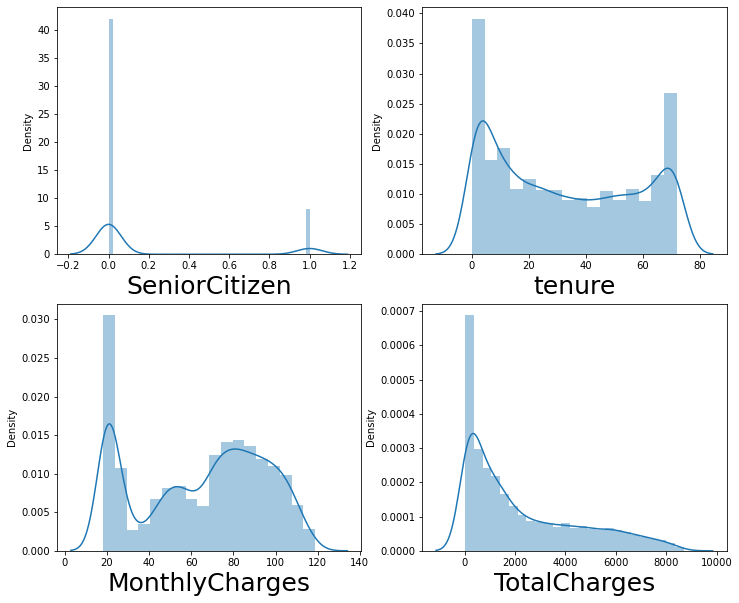

In [35]:
plt.figure(figsize=(12,10))
plotnumber=1

for column in df_churn[num_cols]:
    if plotnumber<=4: #as there are 4 numerical columns 
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df_churn[column])
        plt.xlabel(column,fontsize=25)
    plotnumber +=1
plt.show()

Obs- We can observe right skewness in columns 'tenure','MonthlyCharges','TotalCharges'

In [36]:
#box plot to check outliers

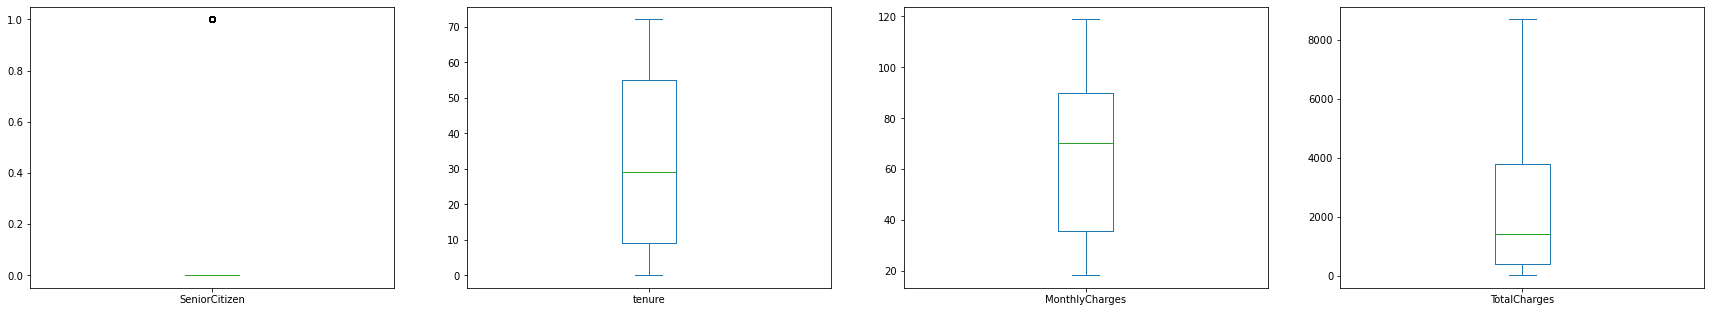

In [37]:
df_churn.plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))
plt.show()

Obs- We can see outliers in column: 'SeniorCitizen' , however , it has values in 0 and 1 format, which is considered as category, and therefore we will not treat the outliers of'SeniorCitizen' 

### Bivariate Analysis and Multivariate Analysis

In [38]:
# Target(Churn) vs Numerical Columns

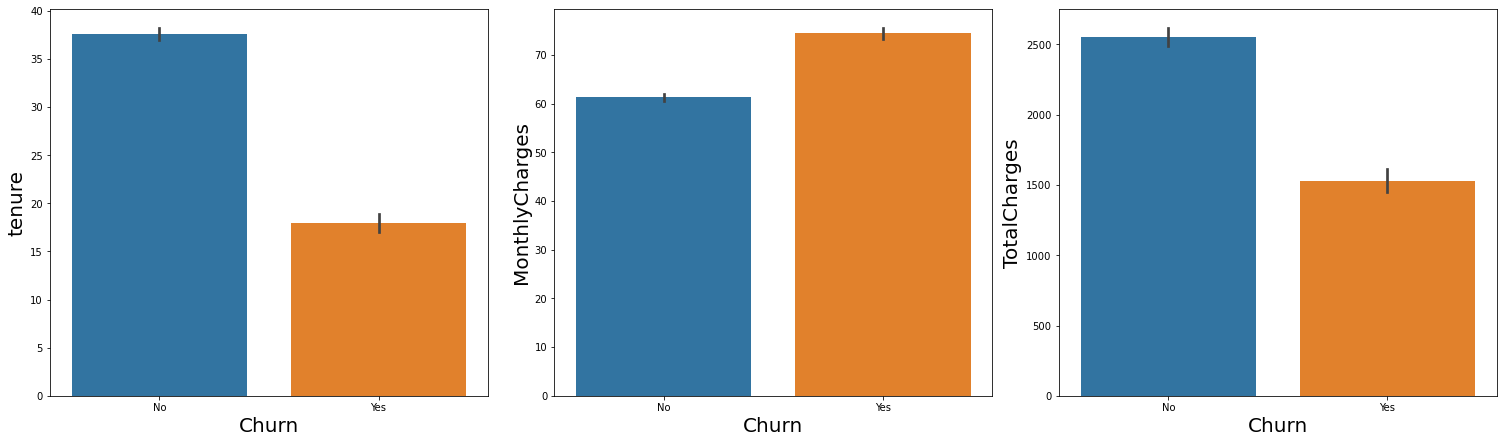

In [39]:
plt.figure(figsize=(35,30),facecolor='white')
plotnum=1
y = df_churn['Churn']
X =df_churn[['tenure','MonthlyCharges','TotalCharges']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Churn',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Obs- We can infer:

* 'Tenure':Majority of customers who are retained have higher tenure period.

* 'MonthlyCharges':Changes in monthly Charges do result in Churn rates.

* 'TotalCharges': For Customers who spend higher charges in total are not affected by rates and are retained

In [40]:
# Target(Churn) vs Categorical Columns

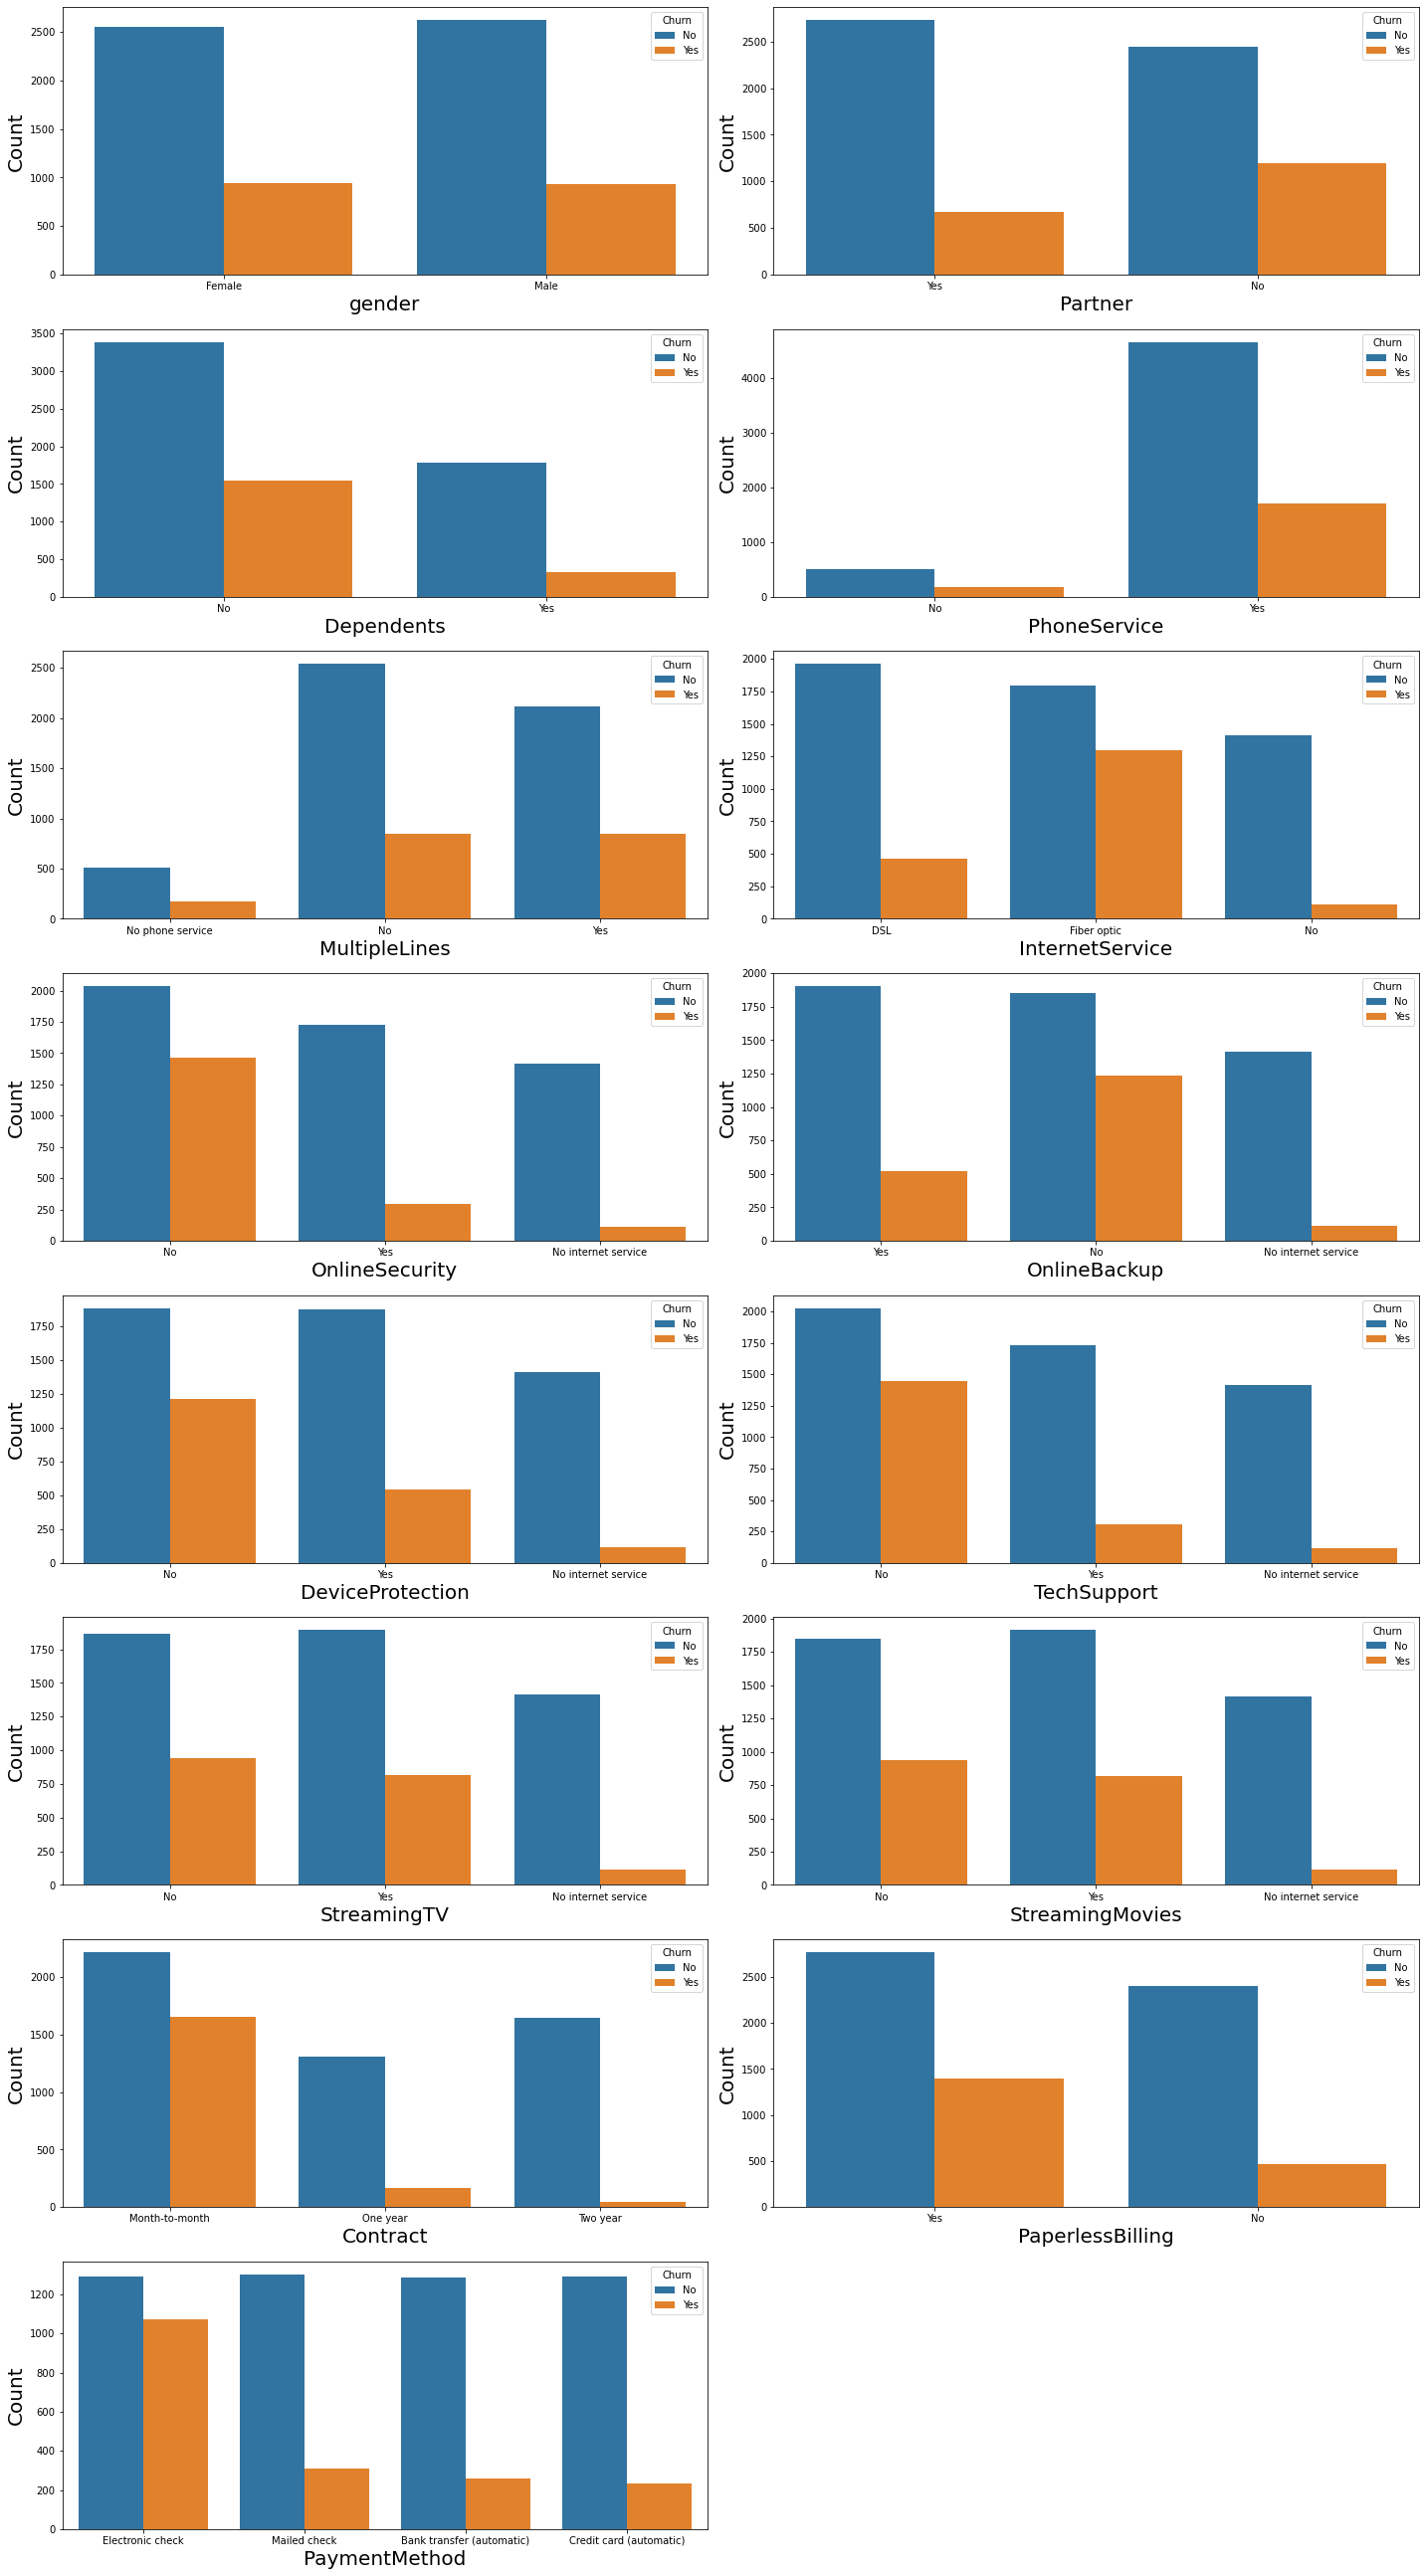

In [41]:
plt.figure(figsize=(20,40),facecolor='white')
plotnum=1
y = df_churn['Churn']
X = df_churn[cat_cols[0:-1]] # Since we do not want Churn Column as input
for col in X:
    if plotnum<=23:
        plt.subplot(9,2,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Obs- Following insights can be infered from the charts:

* 'gender': The churn rate for both male and female is identical.
    
* 'Partner': Foe customers who have partners, do not opt for changing the service, while those are sigles do add to churn.
    
* 'PhoneService': The customers who takes 'phoneservice', nearly only half of them are retained
 
* 'MultipleLines': The person who use 'MultipleLines' of the industry are retained more as compared to those who do not take multiple lines
 
* 'InternetService': Consumers who opt for'DSL' service are more inclined to stick to it, while those who use'OpticalFibre' do opt for service changes frequently
    
* 'OnlineSecurity' and 'OnlineBackup': Customers who don't opt for 'Online Security or Online Backup' are more prompt in changing the service, while those who opt for 'Security or Backup' prefer sticking to the service.
 
* 'DeviceProtection' and 'TechSupport': Similarly, Customers who don't opt for 'DeviceProtection' or 'TechSupport' are more prompt in changing the service, while those who opt for 'DeviceProtection or TechSupport' prefer sticking to the service.

* 'StreamingTV' and 'StreamingMovies': Customers who takes 'StreamingTV and StreamingMovies' service doesnt much affect either retention or churn
 
* 'Contract': Definitely the customers who take monthly plans adds a lot to the churn, as they can leave the service any time in comparison to those who take yearly or two-yearly plans, thus company should provide discounted yearly plans to reduce their churn
    
* 'PaperlessBilling': Although it seems it won't affect churn, but we can see customers who opt for 'Paperless Billing' adds more to churn
    
* 'PaymentMethod': Customers who opt for ElectronicCheck as the payment method do change the services frequently, while those who use either 'MailedCheck or BankTransfer or CreditCard' stick to the company

In [42]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

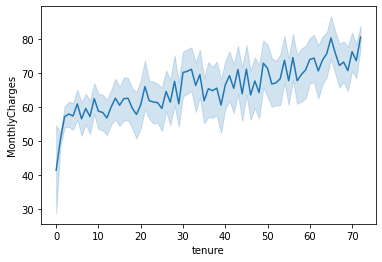

In [43]:
# Checking relationship between tenure and MonthlyCharges
sns.lineplot(x='tenure',y='MonthlyCharges', data=df_churn)

Obs- We can see customers who are in connection with the company for a longer period of time, aids in profitting to the company by spending more amount monthly (by taking more services from the same company) 

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

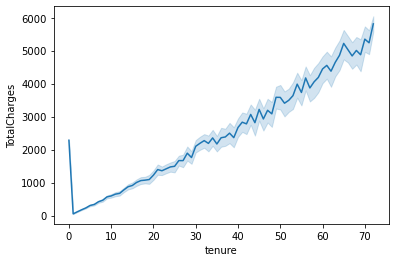

In [44]:
# Checking relationship between tenure and TotalCharges
sns.lineplot(x='tenure',y='TotalCharges', data=df_churn)

Obs- Similar case folows for TotalCharges, i.e with increase in tenure, TotalCharges earned increases

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

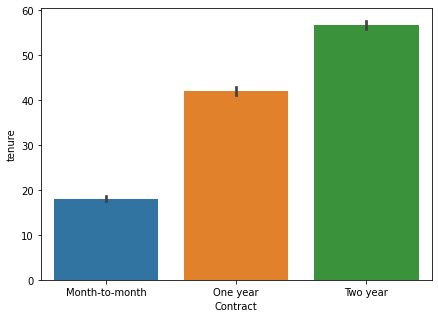

In [45]:
# Checking relationship between tenure and contract
plt.figure(figsize=(7,5))
sns.barplot(y='tenure',x='Contract', data=df_churn)

Obs- We can see for Customers who take Monthly plans have a maximum tenure of 18-19 months, while those who take yearly plans have a tenure of max 40-42 months, and those who opt for 2 years plan almost stick with the company for over 55 months

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

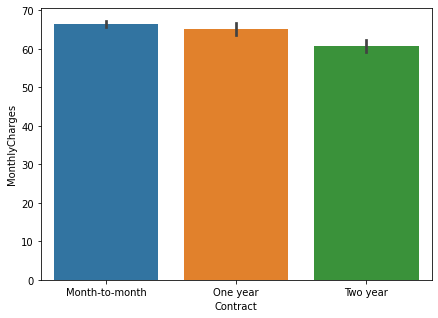

In [46]:
# Checking relationship between contract and MonthlyCharges
plt.figure(figsize=(7,5))
sns.barplot(y='MonthlyCharges',x='Contract', data=df_churn)

Obs- We can see customers who opt for two-yearly plan are able to save more(as they are been given discount) in comparison to those who take yearly plan, and yearly plan subscribers save more than monthly-plan subscribers

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

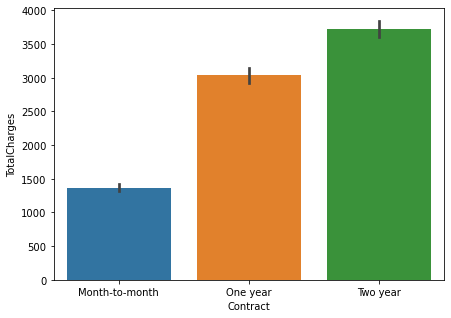

In [47]:
# Checking relationship between contract and TotalCharges
plt.figure(figsize=(7,5))
sns.barplot(y='TotalCharges',x='Contract', data=df_churn)

Obs- We can see can observe a humungous difference in the total charges of customers with different contract. Customers who opt for two-yearly plan are able to save more(as they are been given discount) in comparison to those who take yearly plan, and yearly plan subscribers save more than monthly-plan subscribers

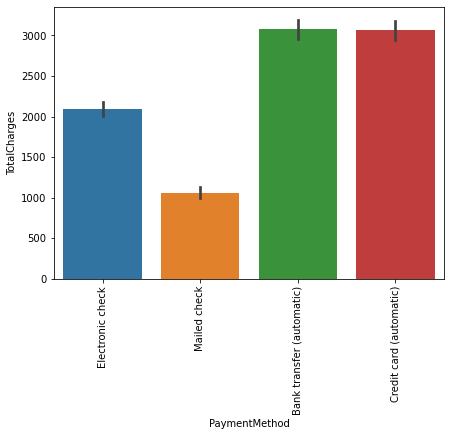

In [48]:
# Checking relationship between contract and TotalCharges
plt.figure(figsize=(7,5))
sns.barplot(x='PaymentMethod',y='TotalCharges', data=df_churn)
plt.xticks(rotation=90)
plt.show()

Obs- Customers who spend large amount for billing opt  for either BankTransfer or CreditCard, whereas others opt for either Electronic Check or Mailed check

## Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
for col in df_churn[cat_cols]:
    le = LabelEncoder()
    df_churn[col] = le.fit_transform(df_churn[col])

In [51]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Obs- We can see all the categorical columns have been encoded
* For churn 0:No, 1:Yes

## Describing the dataset

In [52]:
df_churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Obs- 
* We can see mean in columns 'SeniorCitizen','Partner','Dependents', 'tenure','Contract','TotalCharges','Churn' is greater than median and thus right skewness is present in these columns
* We cna see mean in columns 'gender','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies' is less than median , thus data is left skewed.
* Also the max of columns, 'SeniorCitizen'[We will not be treating it], 'TotalCharges' is exceptionally high than 75% , thus we can say Outliers might be present in these column, we will be checking it later

## Checking Correlation 

In [53]:
df_churn.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

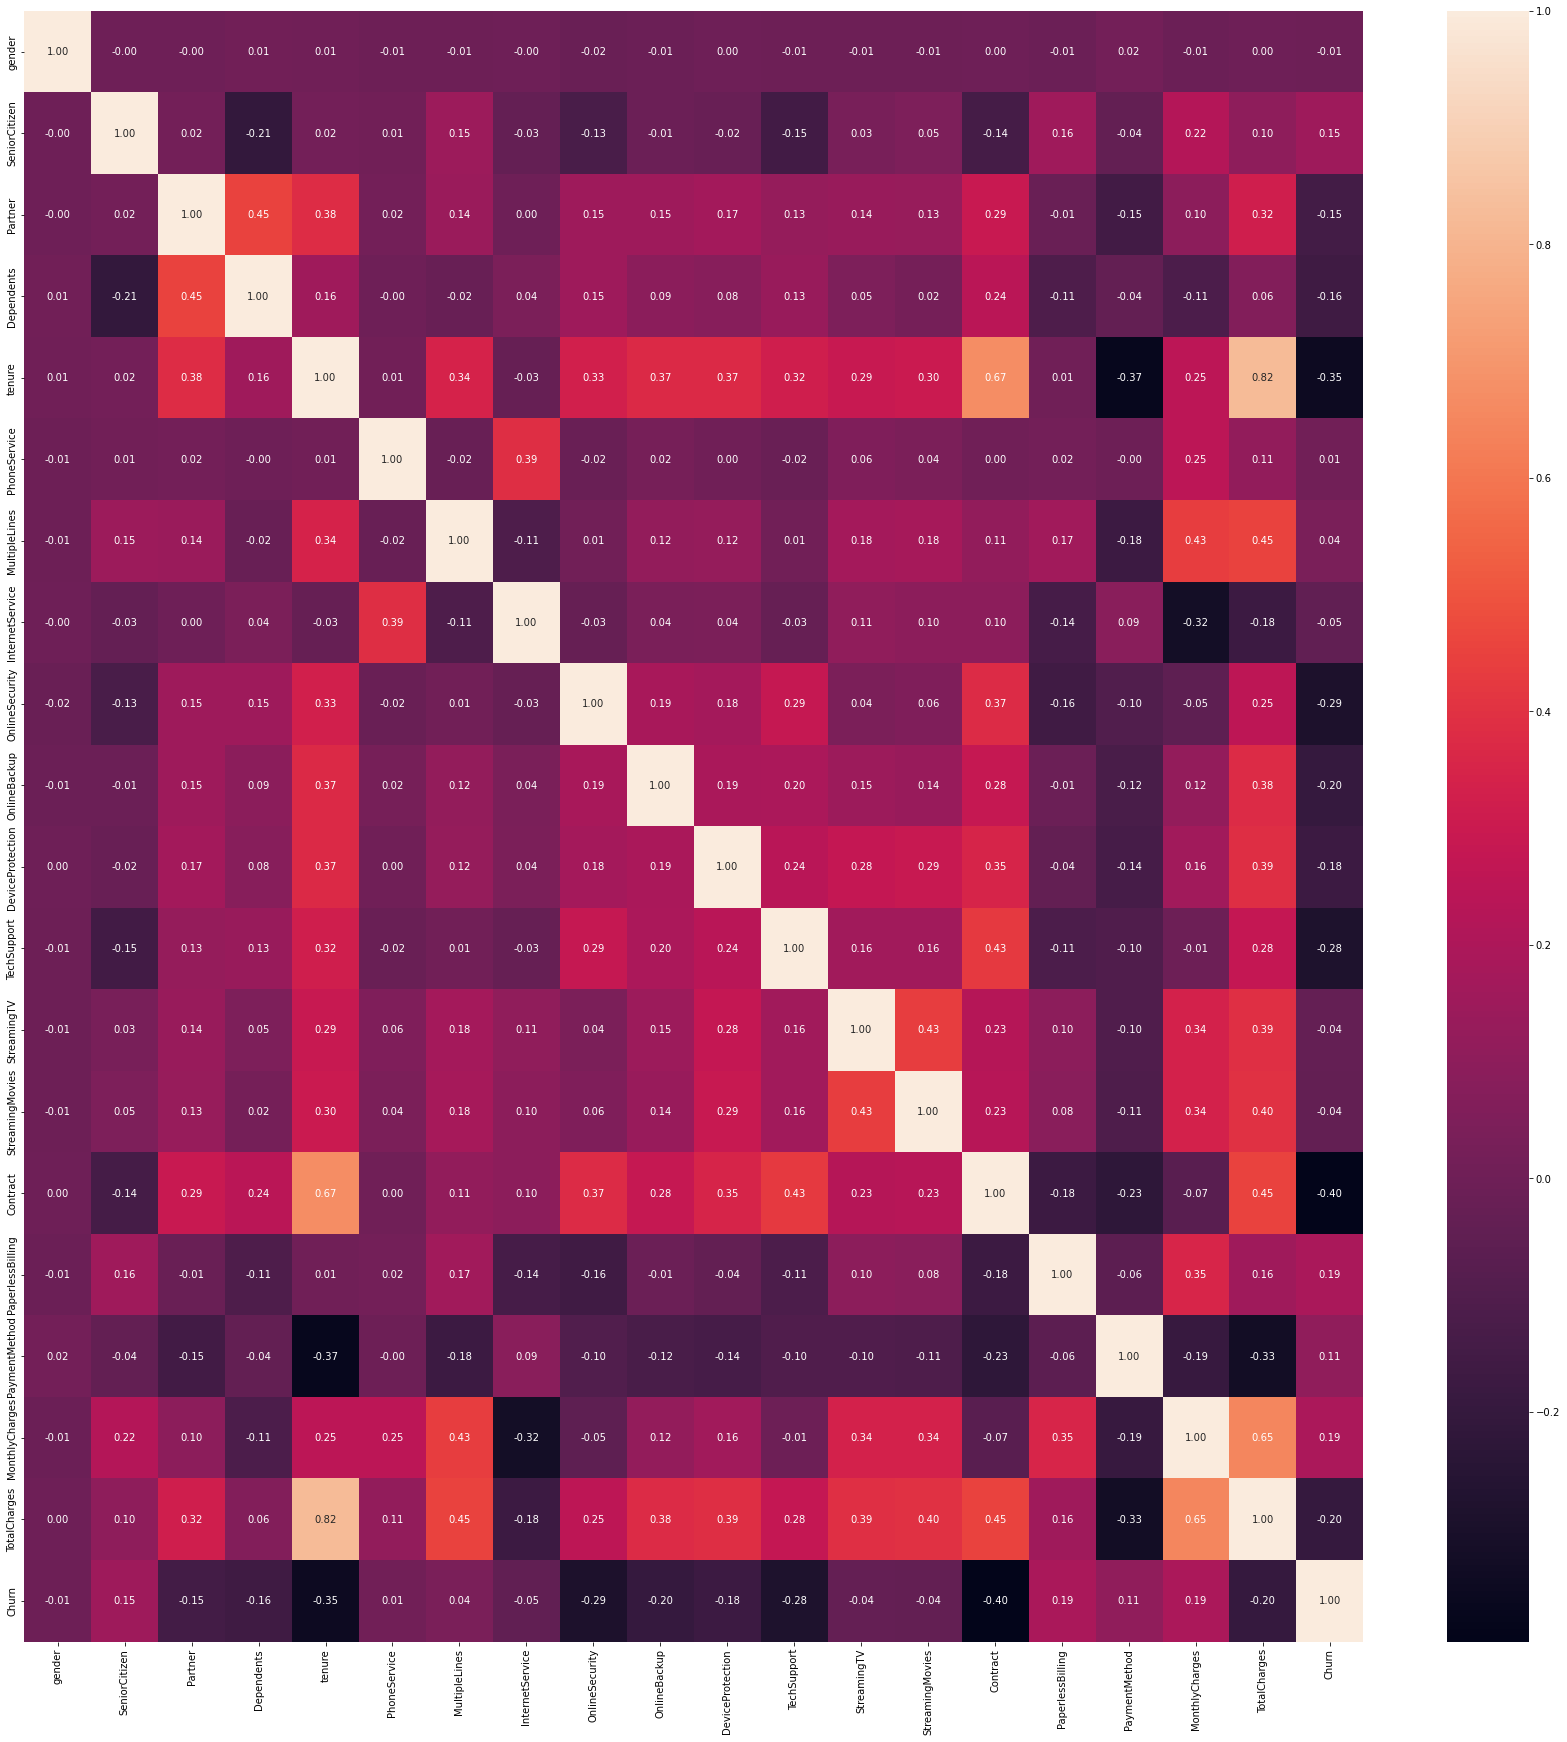

In [54]:
# Correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df_churn.corr(),annot=True,fmt='0.2f')

Obs- We can observe
* 1. Highly positively correlated columns(>=0.7):'Tenure and TotalCharges'
* 2. Positively correlated columns(>=0.4): 'Partner and Dependents', 'tenure and contract' ,'MultipleLines and MonthlyCharges','MultipleLines and TotalCharges', 'StreamingTv and StreamingMovies','StreamingMovies and TotalCharges','Contract and TechSupport','Contract and TotalCharges','MonthlyCharges and TotalCharges'
* 3. Highly negatively correlated columns(>=-0.7): None
* 4. Negatively correlated columns(>=0.3): 'Tenure and PaymentMethod', ,'Tenure and Churn','InternetService and Monthly Charges','Contract and Churn','PaymentMethod and Churn', 

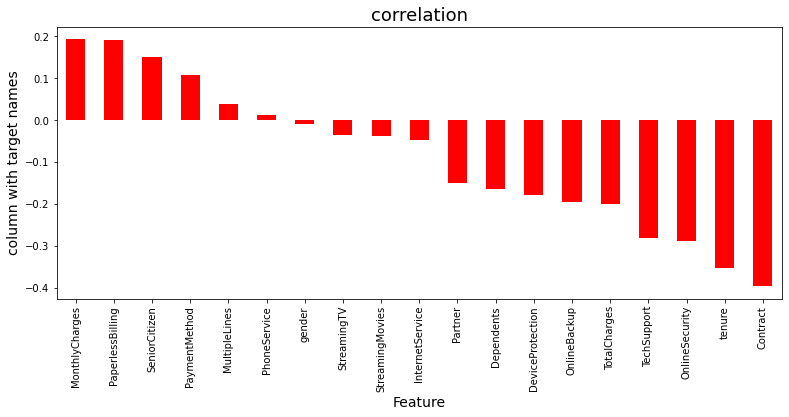

In [55]:
# Correlation of features with Target Column
plt.figure(figsize=(13,5))
df_churn.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Obs- We can see none of the input column is strongly poaitively or negatively correlated with the target ('Churn') column. 

## Detecting Outliers and Treating them

In [72]:
# Checking just for'TotalCharges' Column
#Method 1: Z-Score
from scipy.stats import zscore
z=np.abs(zscore(df_churn['TotalCharges']))
threshold=3
print(np.where(z>3))

(array([], dtype=int64),)


Obs- We can see no outliers are found using Z-Score method

In [77]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_churn['TotalCharges'].quantile(0.25)
Q3=df_churn['TotalCharges'].quantile(0.75)
IQR=Q3 - Q1

df_churn_new2=df_churn[~((df_churn < (Q1 - 1.5 * IQR)) |(df_churn > (Q3 + 1.5 * IQR))).any(axis=1)]

In [78]:
print("df_churn.shape:",df_churn.shape, "\ndf_churn_new2.shape:",df_churn_new2.shape)

df_churn.shape: (6361, 20) 
df_churn_new2.shape: (6361, 20)


Obs- Through IQR too, we can see no outliers are present

## Data Transformation to treat Skewness

In [79]:
df_churn.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges        0.899649
Churn               1.053055
dtype: float64

Obs- 
* We can find skewness is present in columns 'SeniorCitizen','Dependents','Contract','TotalCharges'and 'Churn'.

* However since 'SeniorCitizen','Dependents','Contract' have categorical behaviour, we will not tarnsform it.
* Also, 'Churn' is the target column, we will not transform that too.

### Applying transformation method to treat the skewness

In [81]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
df_churn[['TotalCharges']]= pt.fit_transform(df_churn[['TotalCharges']].values)

In [82]:
#Checking skewness again
df_churn[['TotalCharges']].skew()

TotalCharges   -0.148971
dtype: float64

Obs- We can see the skewness has been removed from "TotalCharges" column

## Model Building

### Seperating Input and Target variables

In [83]:
x = df_churn.drop("Churn",axis=1)
y = df_churn["Churn"]

In [84]:
x.shape

(6361, 19)

In [85]:
y.shape

(6361,)

### Data Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale)

In [91]:
x=pd.DataFrame(data=x_scale)

### Checking multicolinearity using VIF:

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_cal()

    VIF Factor  Features
0     1.002010         0
1     1.152609         1
2     1.472282         2
3     1.388297         3
4    10.789189         4
5          NaN         5
6     1.419707         6
7     1.619497         7
8     1.250786         8
9     1.201301         9
10    1.277682        10
11    1.312568        11
12    1.443873        12
13    1.446213        13
14    2.556121        14
15    1.215653        15
16    1.178567        16
17    4.721406        17
18   13.650355        18


* (Feature Denoted as: 0: 'gender',1:'SeniorCitizen',3:'Partner',4:'Dependents',5:'tenure',6:'PhoneService',7:'MultipleLines', 8:'InternetService',9:'OnlineSecurity',10:'OnlineBackup',11:'DeviceProtection',12:'TechSupport',13:'StreamingTV',14:'StreamingMovies',15:'Contract',16:'PaperlessBilling',17:'PaymentMethod', 18:'MonthlyCharges',19:'TotalCharges')
* Keeping the acceptable range as below or equal 10, we observe the VIF of 4:'Dependents' and 19:'TotalCharges' is high
* Deleting Column TotalCharges as it has highest VIF and good correlation with Monthly charges 

In [98]:
x.drop(18, axis =1, inplace=True) # Dropping 'TotalCharges' column

In [99]:
x.shape

(6361, 18)

In [100]:
# Rechecking the VIF
vif_cal()

    VIF Factor  Features
0     1.002004         0
1     1.152457         1
2     1.469602         2
3     1.386423         3
4     2.831991         4
5          NaN         5
6     1.414143         6
7     1.581417         7
8     1.247462         8
9     1.197778         9
10    1.273978        10
11    1.307465        11
12    1.443508        12
13    1.444977        13
14    2.499640        14
15    1.215107        15
16    1.178015        16
17    2.676973        17


Obs- We can see the VIF of column 4:Dependents has gone down too and now none of the column have VIF>10

### Checking for Imbalance

In [101]:
print(y.value_counts())

0    4662
1    1699
Name: Churn, dtype: int64


Obs-We can see the target is imbalanced, and therefore we need to balance it.

### Oversampling using SMOTE

In [102]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y= SM.fit_resample(x,y)

In [103]:
print(y.value_counts())

0    4662
1    4662
Name: Churn, dtype: int64


## Classification Model 
(As the target is to compare several customer churn prediction models, i.e whether the churn is Yes or No, we are building a clssification model

In [104]:
# Finding best Random State

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    predlg = lg.predict(x_test)
    acc=accuracy_score(y_test, predlg)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7915057915057915  on Random_state  134


### Splitting data into Train-Test

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=134)

### Using various Machine Learning Algorithms

In [106]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1. Logistic Regression

In [107]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg))
print("Classification Report:\n",classification_report(y_test,predlg))

Accuracy: 0.7915057915057915
Confusion Matrix:
 [[895 255]
 [231 950]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1150
           1       0.79      0.80      0.80      1181

    accuracy                           0.79      2331
   macro avg       0.79      0.79      0.79      2331
weighted avg       0.79      0.79      0.79      2331



Obs- The Logistic Regression has provided the accuracy_score 0.7915057915057915and f1-score:0.79

### 2. GaussianNB

In [108]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgnb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgnb))
print("Classification Report:\n",classification_report(y_test,predgnb))

Accuracy: 0.7777777777777778
Confusion Matrix:
 [[858 292]
 [226 955]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      1150
           1       0.77      0.81      0.79      1181

    accuracy                           0.78      2331
   macro avg       0.78      0.78      0.78      2331
weighted avg       0.78      0.78      0.78      2331



Obs- The GaussianNB has provided the accuracy_score: 0.7777777777777778 and f1-score:0.77

### 3.Decision Tree Classifier

In [109]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.7816387816387816
Confusion Matrix:
 [[908 242]
 [267 914]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1150
           1       0.79      0.77      0.78      1181

    accuracy                           0.78      2331
   macro avg       0.78      0.78      0.78      2331
weighted avg       0.78      0.78      0.78      2331



Obs- The Decision Tree Classifier has provided the accuracy-score:0.7816387816387816 and f1-score:0.78

### 4.K Nearest Neighbor Classifier

In [111]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.7987987987987988
Confusion Matrix:
 [[ 791  359]
 [ 110 1071]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      1150
           1       0.75      0.91      0.82      1181

    accuracy                           0.80      2331
   macro avg       0.81      0.80      0.80      2331
weighted avg       0.81      0.80      0.80      2331



Obs- The K Nearest Neighbor Classifier has provided the accuracy-score:0.7987987987987988 and f1-score:0.77

### 5.Support Vector Machine Classifier

In [112]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.8151008151008151
Confusion Matrix:
 [[910 240]
 [191 990]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1150
           1       0.80      0.84      0.82      1181

    accuracy                           0.82      2331
   macro avg       0.82      0.81      0.81      2331
weighted avg       0.82      0.82      0.81      2331



Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.8151008151008151 and f1-score:0.81

### 6. Ensemble Methods
#### 6.1 Random Forest Classifier

In [114]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.8674388674388674
Confusion Matrix:
 [[1000  150]
 [ 159 1022]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      1150
           1       0.87      0.87      0.87      1181

    accuracy                           0.87      2331
   macro avg       0.87      0.87      0.87      2331
weighted avg       0.87      0.87      0.87      2331



Obs- The Random Forest Classifier has provided the accuracy-score:0.8674388674388674 and f1-score:0.87

#### 6.2 Ada Boost Classifier

In [115]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.8232518232518232
Confusion Matrix:
 [[ 912  238]
 [ 174 1007]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82      1150
           1       0.81      0.85      0.83      1181

    accuracy                           0.82      2331
   macro avg       0.82      0.82      0.82      2331
weighted avg       0.82      0.82      0.82      2331



Obs- The Ada Boost Classifier has provided the accuracy-score:0.8232518232518232 and f1-score:0.82

#### 6.3 Gradient Boosting Classifier

In [116]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.858000858000858
Confusion Matrix:
 [[ 963  187]
 [ 144 1037]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1150
           1       0.85      0.88      0.86      1181

    accuracy                           0.86      2331
   macro avg       0.86      0.86      0.86      2331
weighted avg       0.86      0.86      0.86      2331



Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.858000858000858 and f1-score:0.85

### Cross Validation

In [117]:
from sklearn.model_selection import cross_val_score

In [119]:
# Using of K-Fold cross-validation technique

predlg= lg.predict(x_test)

from sklearn.model_selection import cross_val_score

test_accuracy= accuracy_score(y_test,predlg)

for j in range(5,11):
    cv_score=cross_val_score(lg,x,y,cv=j)
    cv_mean= cv_score.mean()
    print('At cv:',j)
    print('Cross_Validation_score is:',cv_mean*100)
    print('Accuracy is :',test_accuracy*100)
    print("\n")

At cv: 5
Cross_Validation_score is: 77.26308552624009
Accuracy is : 79.15057915057915


At cv: 6
Cross_Validation_score is: 77.4024024024024
Accuracy is : 79.15057915057915


At cv: 7
Cross_Validation_score is: 77.31660231660233
Accuracy is : 79.15057915057915


At cv: 8
Cross_Validation_score is: 77.34897562555673
Accuracy is : 79.15057915057915


At cv: 9
Cross_Validation_score is: 77.35950235950236
Accuracy is : 79.15057915057915


At cv: 10
Cross_Validation_score is: 77.39193335449355
Accuracy is : 79.15057915057915




Obs- Selecting the fold value as 6

In [120]:
# cv score for Logistic Regression 
cvlg=cross_val_score(lg,x,y,cv=6).mean()
print('CV score  for Logistic Regression:',cvlg)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlg)-cvlg)

CV score  for Logistic Regression: 0.774024024024024
And Difference between CV and accuracy_score= 0.01748176748176744


In [121]:
# cv score for GaussianNB 
cvgnb=cross_val_score(gnb,x,y,cv=6).mean()
print('CV score  for Gaussian NB:',cvgnb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgnb)-cvgnb)

CV score  for Gaussian NB: 0.7638352638352638
And Difference between CV and accuracy_score= 0.013942513942514001


In [122]:
# cv score for Decision Tree Classifier 
cvdtc=cross_val_score(dtc,x,y,cv=6).mean()
print('CV score  for Decision Tree Classifier:',cvdtc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddtc)-cvdtc)

CV score  for Decision Tree Classifier: 0.7854997854997854
And Difference between CV and accuracy_score= -0.0038610038610037423


In [123]:
# cv score for K Neighbors Classifier 
cvknn=cross_val_score(knn,x,y,cv=6).mean()
print('CV score  for K Neighbors Clssifier:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score  for K Neighbors Clssifier: 0.7878592878592879
And Difference between CV and accuracy_score= 0.010939510939510844


In [124]:
# cv score for Support Vector Machine Classifier 
cvsvc=cross_val_score(svc,x,y,cv=6).mean()
print('CV score  for Support Vector Classifier:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score  for Support Vector Classifier: 0.8034105534105533
And Difference between CV and accuracy_score= 0.011690261690261772


In [125]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=6).mean()
print('CV score  for RandomForestClassifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for RandomForestClassifier: 0.853067353067353
And Difference between CV and accuracy_score= 0.014371514371514404


In [126]:
# cv score for Ada Boost Classifier
cvad=cross_val_score(ad,x,y,cv=6).mean()
print('CV score  for Ada Boost Classifier:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score  for Ada Boost Classifier: 0.8074860574860575
And Difference between CV and accuracy_score= 0.015765765765765716


In [127]:
# cv score for GradientBoostingClassifier
cvgb=cross_val_score(gb,x,y,cv=6).mean()
print('CV score  for Gradienty Boosting Classifier:',cvgb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgb)-cvgb)

CV score  for Gradienty Boosting Classifier: 0.8348348348348348
And Difference between CV and accuracy_score= 0.02316602316602323


Obs- 
* We can observe the difference between CV score and r2_score is least in the models 'DecisionTreeClassifier'
* Finding best parameters to pass in DTC below using hyper parameter tuning

## Hyper Parameter Tuning

In [129]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [130]:
#Selecting few parameter list to pass in Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
# defining parameter range:

parameter = {'criterion':['gini', 'entropy', 'log_loss'],
             'max_features':['sqrt', 'log2', 'auto'],
             'random_state':[14,35,42,57],
             'splitter':['best', 'random']}

In [132]:
# Passing this parameters to GridSearchCV
GCV = GridSearchCV(dtc,parameter,cv=6,scoring='accuracy')

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting accuracy with obtained best parameter 
accuracy_score(y_test, GCV_pred)                  #Printing accuracy

{'criterion': 'entropy', 'max_features': 'sqrt', 'random_state': 14, 'splitter': 'random'}


0.8000858000858001

In [134]:
#Applying best parameter values on Decision Tree Classifier Algorithm 
churn_best=DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state= 14, splitter='random')
churn_best.fit(x_train,y_train)
preddtc1=churn_best.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc1))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc1))
print("Classification Report:\n",classification_report(y_test,preddtc1))

Accuracy: 0.8000858000858001
Confusion Matrix:
 [[915 235]
 [231 950]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1150
           1       0.80      0.80      0.80      1181

    accuracy                           0.80      2331
   macro avg       0.80      0.80      0.80      2331
weighted avg       0.80      0.80      0.80      2331



Our best model with best parameters has given a very good accuracy of  0.8000858000858001 and f1_score of 0.80

### Plotting ROC-AUC curve for best model

In [135]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

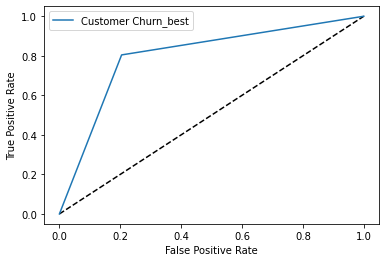

In [137]:
fpr,tpr,threshholds=roc_curve(y_test,preddtc1)
auc = roc_auc_score(y_test,preddtc1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Customer Churn_best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Obs- The best model ie. Decision Tree Classifier has AUC(area under curve)=  0.80%

## Saving the best model

In [138]:
import joblib

joblib.dump(churn_best,'Churn.obj')

['Churn.obj']

In [139]:
churn_model=joblib.load('Churn.obj')

In [140]:
churn_model

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=14, splitter='random')

## Predicting the Output

In [141]:
ori = np.array(y_test)
predicted = np.array(churn_best.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new

,Original,Predicted
0,1,1
1,1,1
2,0,0
3,0,1
4,0,1
...,...,...
2326,1,1
2327,1,1
2328,1,0
2329,0,0


Obs- We can see our best model has given mostly similar results as original

Text(0.5, 1.0, 'Original vs predicted  graph')

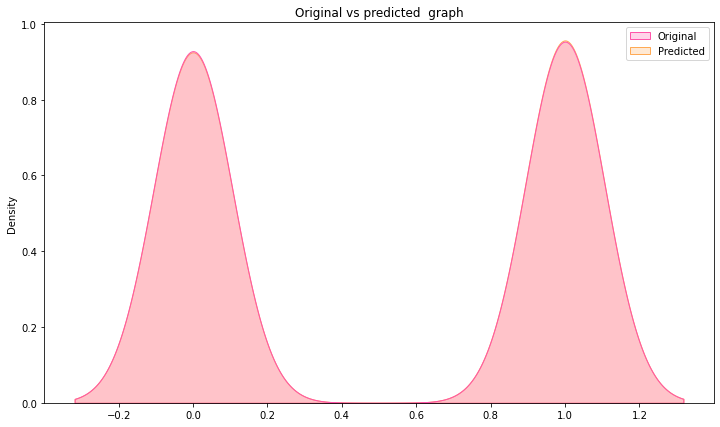

In [146]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='spring',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

Obs- We can observe that the graph of predicted follows almost identical as the original one

## Concluding Remarks

* We have predicted the Churn of a Telecom Industry by collecting the dataset of numerous customers who have taken different services and have started using the service freshly or over a period of 5-6 years and spending differently on the services. 
* We classified the output using classification model. The prediction accuracies of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* The prediction results indicated that Decision Tree Classifier model achieved higher prediction accuracy.